# **Mounting the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow==2.2.0 keras==2.3.1

     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 378kB 33.6MB/s 
     |████████████████████████████████| 3.0MB 35.3MB/s 
     |████████████████████████████████| 460kB 53.2MB/s 
     |████████████████████████████████| 2.9MB 35.4MB/s 
     |████████████████████████████████| 51kB 9.7MB/s 
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
  Found existi

# **Importing the Library**

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# **Data Exploration**

In [5]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/brain/train'
test_path = '/content/drive/MyDrive/brain/test'

# **Image Preprocessing & Feature Extraction**

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 731 images belonging to 5 classes.
Found 823 images belonging to 5 classes.


# **DenseNet121**

In [8]:
from tensorflow.keras.applications import DenseNet121, DenseNet169
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29089792/29084464 [==============================] - 0s 0us/step


In [9]:
x1= Flatten()(des121.output)
prediction1 = Dense(5, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [10]:
r1 = model1.fit(train_set, validation_data=test_set, epochs=20, steps_per_epoch=5, validation_steps=5)

Epoch 1/20
5/5 [==============================] - 77s 15s/step - loss: 13.0762 - accuracy: 0.2688 - val_loss: 22.2985 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 60s 12s/step - loss: 1.2407 - accuracy: 0.7875 - val_loss: 59.1627 - val_accuracy: 0.4187
Epoch 3/20
5/5 [==============================] - 50s 10s/step - loss: 0.7882 - accuracy: 0.8438 - val_loss: 236.4613 - val_accuracy: 0.1875
Epoch 4/20
5/5 [==============================] - 38s 8s/step - loss: 0.1838 - accuracy: 0.9548 - val_loss: 240.9135 - val_accuracy: 0.2000
Epoch 5/20
5/5 [==============================] - 28s 6s/step - loss: 0.1125 - accuracy: 0.9750 - val_loss: 572.8510 - val_accuracy: 0.2188
Epoch 6/20
5/5 [==============================] - 23s 5s/step - loss: 0.2122 - accuracy: 0.9871 - val_loss: 364.7707 - val_accuracy: 0.1875
Epoch 7/20
5/5 [==============================] - 18s 4s/step - loss: 0.0645 - accuracy: 0.9742 - val_loss: 358.7040 - val_accuracy: 0.0938
Epoch 8/20
5/5 [==

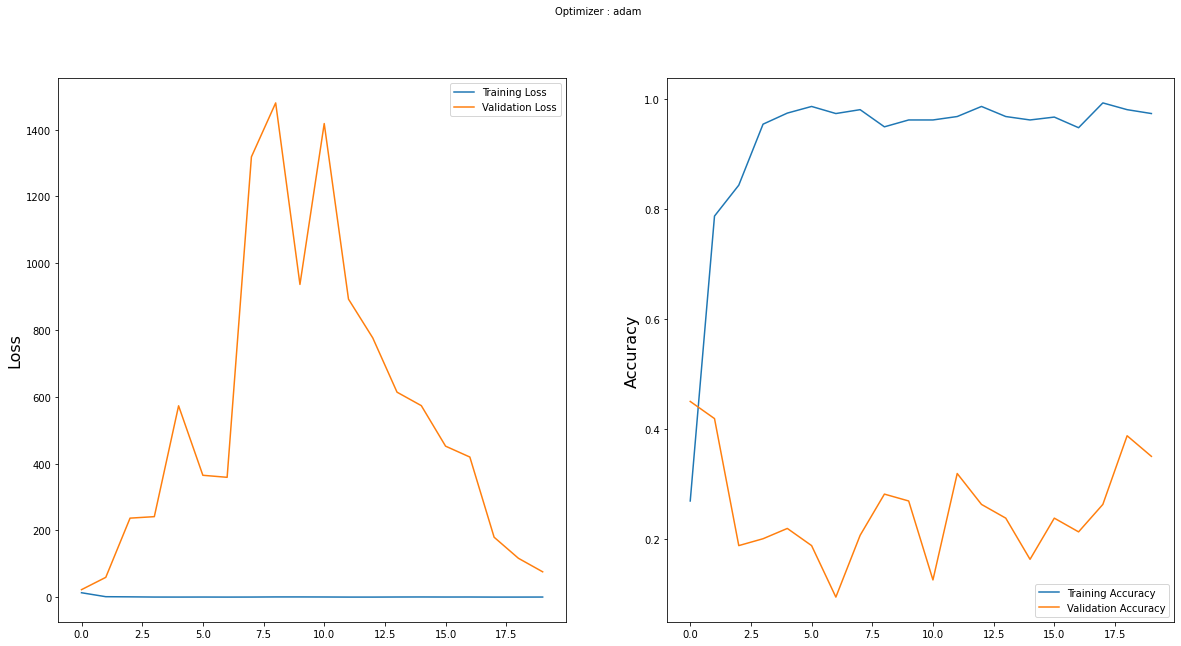

In [11]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet169**

In [12]:
des169=DenseNet169(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

51879936/51877672 [==============================] - 0s 0us/step


In [13]:
x1= Flatten()(des169.output)
prediction1 = Dense(5, activation='softmax')(x1)
model2 = Model(inputs = des169.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [14]:
r1 = model2.fit(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
23/23 [==============================] - 22s 937ms/step - loss: 3.9548 - accuracy: 0.7456 - val_loss: 36.7693 - val_accuracy: 0.2199
Epoch 2/20
23/23 [==============================] - 15s 673ms/step - loss: 0.4255 - accuracy: 0.9425 - val_loss: 293.2159 - val_accuracy: 0.2576
Epoch 3/20
23/23 [==============================] - 16s 686ms/step - loss: 0.1075 - accuracy: 0.9617 - val_loss: 50.6710 - val_accuracy: 0.2819
Epoch 4/20
23/23 [==============================] - 16s 677ms/step - loss: 0.0501 - accuracy: 0.9808 - val_loss: 256.4472 - val_accuracy: 0.2819
Epoch 5/20
23/23 [==============================] - 16s 705ms/step - loss: 0.1661 - accuracy: 0.9740 - val_loss: 304.0612 - val_accuracy: 0.3269
Epoch 6/20
23/23 [==============================] - 16s 680ms/step - loss: 0.0565 - accuracy: 0.9863 - val_loss: 110.6351 - val_accuracy: 0.2928
Epoch 7/20
23/23 [==============================] - 16s 682ms/step - loss: 0.0538 - accuracy: 0.9904 - val_loss: 55.5014 - val_accur

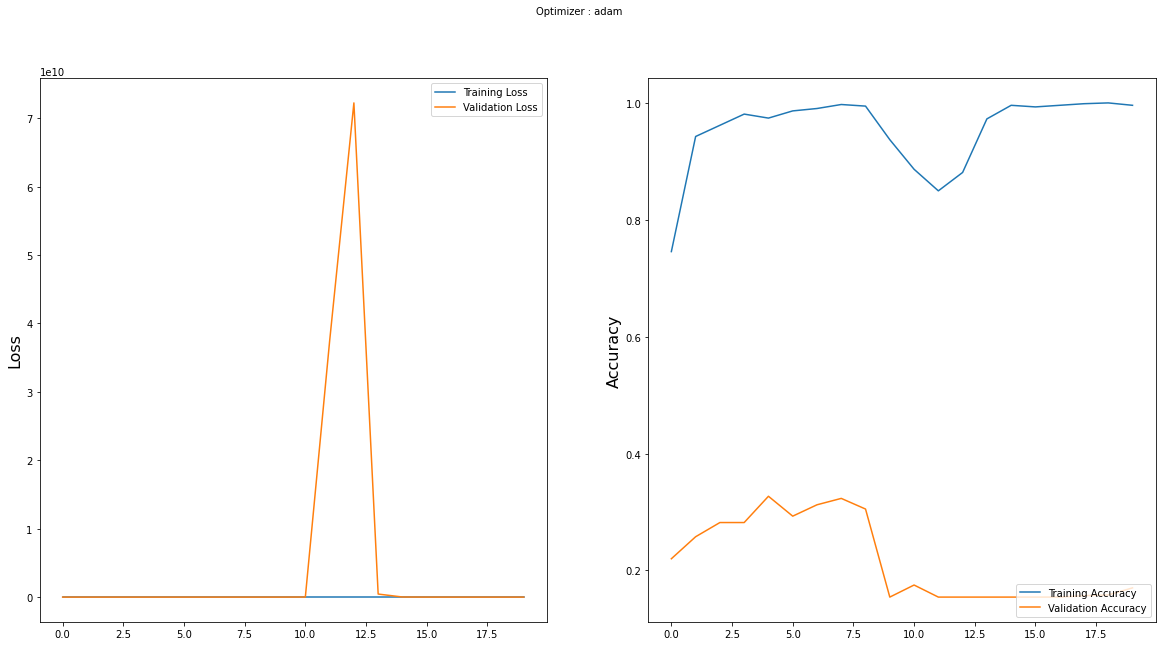

In [15]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Inception ResNetV2 with RNN**

In [16]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [17]:
x31 = Flatten()(inc.output)
predictionss = Dense(5, activation='softmax')(x31)

In [18]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [19]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=2000, steps_per_epoch=5, validation_steps=5)
x=r2

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 3.1133 - accuracy: 0.3187 - val_loss: 60.5131 - val_accuracy: 0.1937
Epoch 2/100
5/5 [==============================] - 3s 694ms/step - loss: 1.8473 - accuracy: 0.6625 - val_loss: 483.0435 - val_accuracy: 0.1000
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 0.2937 - accuracy: 0.9290 - val_loss: 2009.5537 - val_accuracy: 0.0812
Epoch 4/100
5/5 [==============================] - 3s 694ms/step - loss: 0.2170 - accuracy: 0.9500 - val_loss: 4558.9937 - val_accuracy: 0.1312
Epoch 5/100
5/5 [==============================] - 3s 692ms/step - loss: 0.0254 - accuracy: 0.9937 - val_loss: 5948.8672 - val_accuracy: 0.0562
Epoch 6/100
5/5 [==============================] - 4s 714ms/step - loss: 0.4055 - accuracy: 0.9375 - val_loss: 2245.9114 - val_accuracy: 0.0875
Epoch 7/100
5/5 [==============================] - 3s 695ms/step - lo

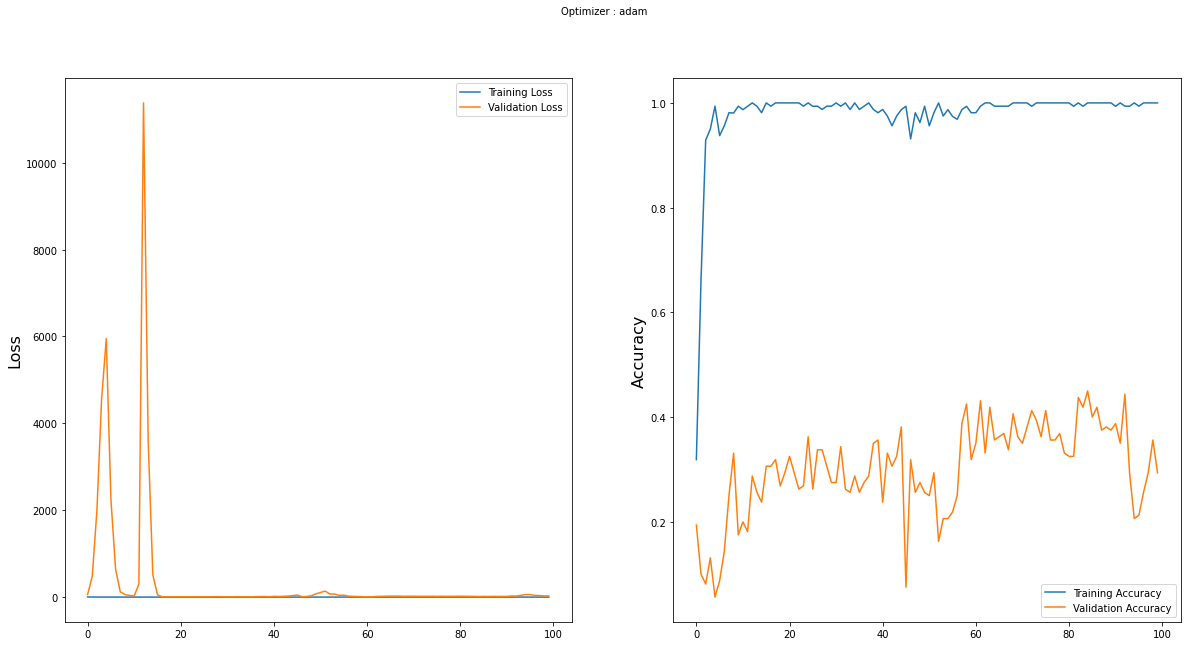

In [20]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet50**

In [21]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [22]:
x = Flatten()(resnet.output)
prediction = Dense(5, activation='softmax')(x)

In [23]:
model12 = Model(inputs = resnet.inputs, outputs = prediction)
model12.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [24]:
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
23/23 [==============================] - 18s 775ms/step - loss: 2.5192 - accuracy: 0.7989 - val_loss: 4128.6172 - val_accuracy: 0.2819
Epoch 2/20
23/23 [==============================] - 15s 649ms/step - loss: 0.4028 - accuracy: 0.9425 - val_loss: 1008.6535 - val_accuracy: 0.1543
Epoch 3/20
23/23 [==============================] - 15s 654ms/step - loss: 0.1028 - accuracy: 0.9781 - val_loss: 85213.8594 - val_accuracy: 0.1543
Epoch 4/20
23/23 [==============================] - 15s 661ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 401.3183 - val_accuracy: 0.1543
Epoch 5/20
23/23 [==============================] - 15s 658ms/step - loss: 0.0270 - accuracy: 0.9904 - val_loss: 4.9601 - val_accuracy: 0.2066
Epoch 6/20
23/23 [==============================] - 15s 656ms/step - loss: 0.0687 - accuracy: 0.9850 - val_loss: 12.1316 - val_accuracy: 0.0996
Epoch 7/20
23/23 [==============================] - 15s 660ms/step - loss: 1.6096 - accuracy: 0.9699 - val_loss: 2.2222 - val_acc

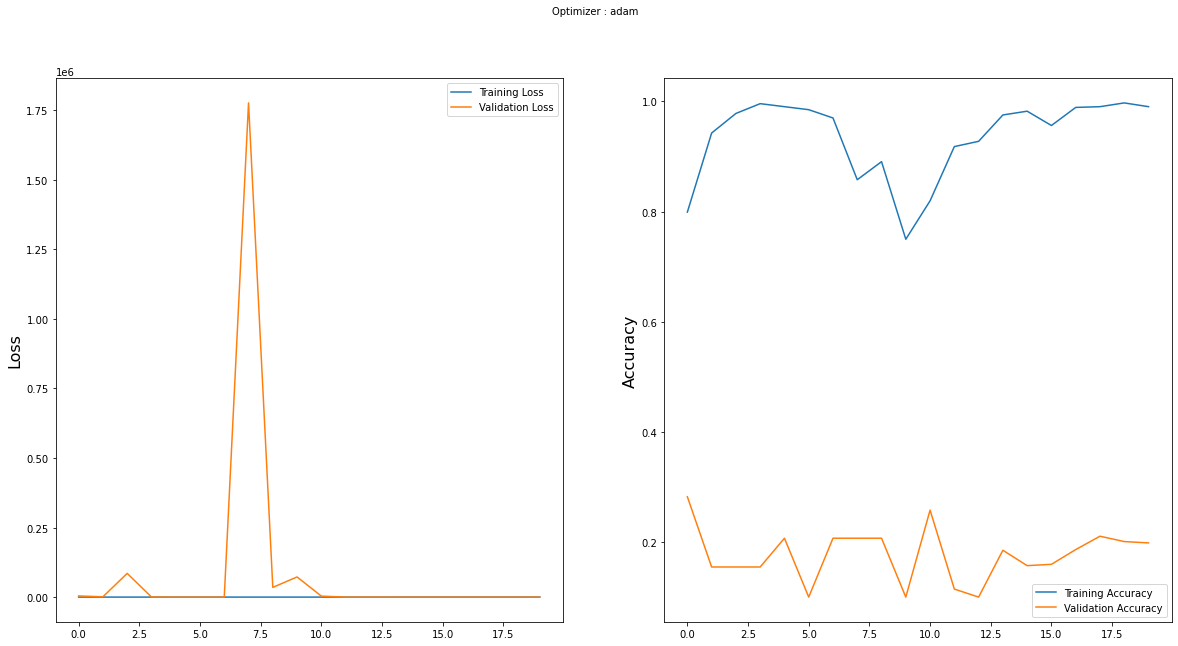

In [26]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **CNN**

In [27]:
from tensorflow.keras.models import Sequential
# To initialize neural network
from tensorflow.keras.layers import Convolution2D
# Images are two dimensional, concolution step
from tensorflow.keras.layers import MaxPooling2D
# Pooling step
from tensorflow.keras.layers import Flatten
# Convert pools feature map into this large feature vector
from tensorflow.keras.layers import Dense

In [28]:
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(224,224,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines

In [29]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [30]:
classifier.add(Flatten())

In [31]:

classifier.add(Dense(5, activation = 'relu'))


In [32]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [33]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 5765      
Total params: 15,909
Trainable params: 15,909
Non-trainable params: 0
____________________________________________________

In [34]:
results=classifier.fit_generator(train_set,epochs=2000,validation_data=test_set)

Epoch 1/500
23/23 [==============================] - 12s 517ms/step - loss: 1.4535 - accuracy: 0.3461 - val_loss: 1.8497 - val_accuracy: 0.1507
Epoch 2/500
23/23 [==============================] - 12s 518ms/step - loss: 1.3172 - accuracy: 0.4733 - val_loss: 2.4029 - val_accuracy: 0.1701
Epoch 3/500
23/23 [==============================] - 12s 511ms/step - loss: 1.2576 - accuracy: 0.5253 - val_loss: 2.9922 - val_accuracy: 0.2843
Epoch 4/500
23/23 [==============================] - 12s 522ms/step - loss: 1.2464 - accuracy: 0.5718 - val_loss: 2.9685 - val_accuracy: 0.3001
Epoch 5/500
23/23 [==============================] - 12s 523ms/step - loss: 1.4038 - accuracy: 0.4761 - val_loss: 2.2449 - val_accuracy: 0.2673
Epoch 6/500
23/23 [==============================] - 12s 514ms/step - loss: 1.2686 - accuracy: 0.5458 - val_loss: 2.3271 - val_accuracy: 0.2442
Epoch 7/500
23/23 [==============================] - 12s 522ms/step - loss: 1.2332 - accuracy: 0.5499 - val_loss: 2.8152 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

x=results
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [50]:
modelss.save('/content/drive/MyDrive/brain/model.h5')